#### Acitivity of Zebra Fish and Melatonin
In this study, the researchers in Prof. Prober's lab studied the activity of zebrafish larvae. Each fish was put in its own little well and recorded with a camera. Whenever a fish moves, the system detects and records the movement, indicated here by the red flashes in the video. The more movement, the more wakeful the fish. These fish are interesting because some of them have a mutation in a gene involved in producing melatonin, an important hormone for sleep regulation. Fish that have the mutation are called mutants, and those that do not are called wild type. If we look at the mean activity of the fish over time, we see that compared to wild type the mutant fish are more active at night, which is indicated by the gray regions on the plot. Our goal with this warm-up analysis is to quantify the effect of this mutation on wakefulness. We will use nighttime active bouts as a metric for wakefulness of the fish. An active bout is a period of time where a fish is consistently active. The *length* of an active bout is the number of consecutive minutes that a fish is active. 
Generically speaking, a probability distribution is a mathematical description of outcomes. But they are easier to think about as stories. Here, I will review the Exponential distribution. Its story has to do with Poisson processes. For a Poisson process, the timing of an event, called an "arrival," is completely independent of when the previous event arrived. The waiting time between arrivals is Exponentially distributed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst # module containing all functions we used in 1_statistical_thinking and 2_statistical thinking

#### EDA: Plot ECDFs of active bout length
An active bout is a stretch of time where a fish is constantly moving. Plot an ECDF of active bout length for the mutant and wild type fish for the seventh night of their lives. The data sets are in the numpy arrays bout_lengths_wt and bout_lengths_mut. The bout lengths are in units of minutes.

In [2]:
df = pd.read_csv('gandhi_et_al_bouts.csv')

In [3]:
df.head()

,genotype,bout_length,fish
0,het,12.00,1
1,het,33.00,1
2,het,0.96,1
3,het,4.98,1
4,het,1.98,1


In [4]:
## Selecting the columns from the dataframe that will be used to plot the ecdf
bout_lengths_wt = df[df['genotype'] == 'wt']['bout_length'].to_numpy()
bout_lengths_mut = df[df['genotype'] == 'mut']['bout_length'].to_numpy()

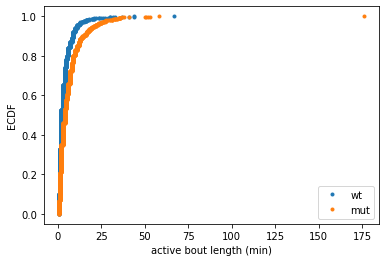

In [5]:
# Import the dc_stat_think module as dcst
import dc_stat_think as dcst

# Generate x and y values for plotting ECDFs
x_wt, y_wt = dcst.ecdf(bout_lengths_wt)
x_mut, y_mut = dcst.ecdf(bout_lengths_mut)

# Plot the ECDFs
_ = plt.plot(x_wt, y_wt, marker = '.', linestyle = 'none')
_ = plt.plot(x_mut, y_mut, marker = '.', linestyle = 'none')

# Make a legend, label axes, and show plot
_ = plt.legend(('wt', 'mut'))
_ = plt.xlabel('active bout length (min)')
_ = plt.ylabel('ECDF')
plt.show()

Great work! There is an outlier of one active bout for a mutant fish, and the ECDF exposes this clearly. It is important to know about, but we will not focus on it going forward, though.

#### Interpreting ECDFs and the story
While a more detailed analysis of distributions is often warranted for careful analyses, you can already get a feel for the distributions and the story behind the data by eyeballing the ECDFs. 

The bout lengths appear Exponentially distributed, which implies that exiting an active bout to rest is a Poisson process; the fish have no apparent memory about when they became active.

While not exactly Exponentially distributed, the ECDF has no left tail, and no discernible inflection point, which is very much like the Exponential CDF.

#### Parameter estimation: active bout length
Compute the mean active bout length for wild type and mutant, with 95% bootstrap confidence interval. The data sets are again available in the numpy arrays bout_lengths_wt and bout_lengths_mut. The dc_stat_think module has been imported as dcst.

In [6]:
# Compute mean active bout length
mean_wt = np.mean(bout_lengths_wt)
mean_mut = np.mean(bout_lengths_mut)

# Draw bootstrap replicates
bs_reps_wt = dcst.draw_bs_reps(bout_lengths_wt, np.mean, size = 10000)
bs_reps_mut = dcst.draw_bs_reps(bout_lengths_mut, np.mean, size = 10000)

# Compute 95% confidence intervals
conf_int_wt = np.percentile(bs_reps_wt, [2.5, 97.5])
conf_int_mut = np.percentile(bs_reps_mut, [2.5, 97.5])

# Print the results
print("""
wt:  mean = {0:.3f} min., conf. int. = [{1:.1f}, {2:.1f}] min.
mut: mean = {3:.3f} min., conf. int. = [{4:.1f}, {5:.1f}] min.
""".format(mean_wt, *conf_int_wt, mean_mut, *conf_int_mut))


wt:  mean = 3.874 min., conf. int. = [3.6, 4.1] min.
mut: mean = 6.543 min., conf. int. = [6.1, 7.0] min.



The confidence intervals are quite separated. Nonetheless, we will proceed to perform hypothesis tests.

#### Permutation and Bootstrap Hypothesis Tests
You just found that the mean active bout length for mutant fish that have inhibited melatonin production is much longer than for wild type fish that have normal melatonin production.
This is especially clear if we look at the confidence intervals graphically. Obviously, there is an effect on activity due to mutation of this gene. In addition to mutant fish, Prof. Prober's lab also studied heterozygotic fish. These are fish that have one mutated copy of the gene and one functional copy, unlike the mutant, which has two mutated copies, or wild type, which has two functional copies. When we do the same analysis of the heterozygote, we see that the effect is much smaller. Indeed, if we look at the ECDFs of active bout length, here with the x-axis range adjusted for ease of comparison, we see only a slight difference between the wild type and heterozygotic fish. We have quantified the differences, and we can see them graphically, but now is a good time to test the hypothesis that there is no difference between the heterozygotic and wild type fish. 
A hypothesis test is an assessment of how reasonable the observed data are assuming a hypothesis, called the null hypothesis, is true. The result of a hypothesis test is a p-value, defined as the probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true. As a reminder, a test statistic is a single number that can be computed from observed data and from data you simulate under the null hypothesis to serve as a basis of comparison.
The p-value only makes sense if the null hypothesis, test statistic, and the meaning of "at least as extreme as" are clearly defined. So, the pipeline for doing a hypothesis test is to clearly state the null hypothesis and the test statistic. Then you *simulate* production of the data as if the null hypothesis were true. For each of these simulated data sets, compute the test statistic. The p-value is then the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data. Let's consider now the hypothesis that the active bout lengths of wild type and heterozygotic fish are identically distributed. We will use the difference in means of the active bout lengths as a test statistic, and consider test statistics greater than or equal to what was observed to be "at least as extreme as." 
The hypothesis says that wild type and heterozygotic fish are completely indistinguishable with respect to their active bout lengths. To simulate this, you can scramble which bout lengths are labeled "wild type" and which are labeled "heterozygote" and compute the test statistic. You do this over and over again to get many permutation replicates. This is called a *permutation test*. You implemented this in the `draw_perm_reps()` function of the `dc_stat_think` module. The first two arguments are the two data sets you are comparing in the hypothesis test. The third argument is a function used to compute the test statistic. You already wrote one to do difference of means, and it is also included in the `dc_stat_think` module. The last argument says how many replicates to generate. Finally, the p-value is computed as the fraction of replicates at least as extreme as what was observed.

#### Permutation test: wild type versus heterozygote
Test the hypothesis that the heterozygote and wild type bout lengths are identically distributed using a permutation test.

In [7]:
#Extracing the bout length for the heterozygote fish
bout_lengths_het = df[df['genotype'] == 'het']['bout_length']

In [8]:
# Compute the difference of means: diff_means_exp
diff_means_exp = np.mean(bout_lengths_het) - np.mean(bout_lengths_wt)

# Draw permutation replicates: perm_reps
perm_reps = dcst.draw_perm_reps(bout_lengths_het, bout_lengths_wt, 
                               dcst.diff_of_means, size = 10000)

# Compute the p-value: p-val
p_val = np.sum(perm_reps >= diff_means_exp) / len(perm_reps)

# Print the result
print('p =', p_val)

p = 0.0008


A p-value of 0.001 suggests that the observed difference in means is unlikely to occur if heterozygotic and wild type fish have active bout lengths that are identically distributed.